In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from statistics import mean 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
reviews = pd.read_csv('rotten_tomatoes_reviews1.csv', skiprows = [0], names=["freshness", "review"])
# reviews = pd.read_csv('/content/drive/My Drive/rotten_tomatoes_reviews1.csv', skiprows = [0], names=["freshness", "review"])
reviews = reviews.sample(100000, random_state=42)

# Exploratory Data Analysis

In [0]:
reviews.head(5)

,freshness,review
227947,rotten,Gone Girl may begin a smart and promising mys...
130796,rotten,One of the most unnecessary sequels of all ti...
308424,rotten,"Despite a superb cast, artful set design and ..."
389388,fresh,"Ssuperbly acted and, for much of its intricat..."
399901,fresh,Wonder Woman is glorious.


In [0]:
reviews.describe()

,freshness,review
count,100000,100000
unique,2,92538
top,rotten,Parental Content Review
freq,50013,40


In [0]:
reviews.groupby('freshness').describe()

review                                      
           count unique                       top freq
freshness                                             
fresh      49987  47451   Parental Content Review   12
rotten     50013  45094   Parental Content Review   28

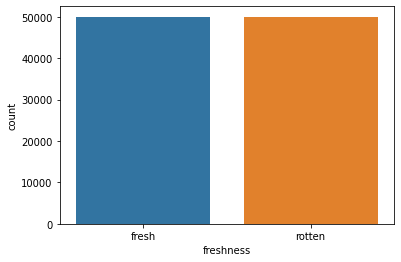

In [0]:
sns.countplot(x='freshness', data=reviews)
plt.show()

In [0]:
review_lengths = reviews['review'].str.len()
# temp_frame = pd.DataFrame(reviews['freshness'])
reviews['length'] = review_lengths
reviews.head()

,freshness,review,length
312423,fresh,Screenwriter/star Nickola Shreli puts some th...,153
6849,fresh,The Cured may owe much to viral shockers like...,165
361455,rotten,Kingsman: The Golden Circle stumbles in a dru...,248
5537,fresh,"A Hitchcockian stunt, more interesting for it...",87
166017,rotten,[The movie] is so determined to be moral and ...,144


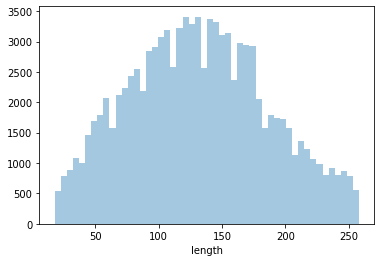

In [0]:
sns.distplot(reviews['length'], kde=False)
plt.show()

In [0]:
ans = reviews['length'].describe()
print('Total number of reviews:', ans[0])
print('Mean length of reviews:', ans[1])
print('Minimum length of reviews:', ans[3])
print('Maximum length of reviews:', ans[7])
print('Standard deviation of length:', ans[2])

Total number of reviews: 100000.0
Mean length of reviews: 131.47389
Minimum length of reviews: 18.0
Maximum length of reviews: 258.0
Standard deviation of length: 54.66427297692026


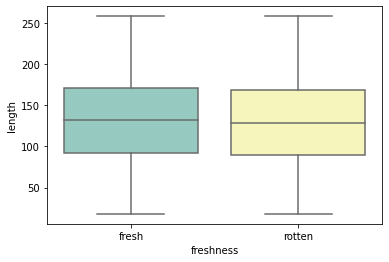

In [0]:
sns.boxplot(x="freshness", y="length", data=reviews, palette='Set3')
plt.show()

# Data Preparation

In [0]:
X = reviews['review']
y = reviews['freshness']
################################
# y = reviews['freshness'].map({'rotten': 0, 'fresh': 1}).astype(int)
# y = pd.DataFrame(reviews['freshness'].copy())
# y['freshness'] = y['freshness'].map({'rotten': 0, 'fresh': 1}).astype(int)
# y = y['freshness'].values
################################
train__X, test__X, train__y, test__y = train_test_split(X, y, test_size=0.20, random_state=20)
################################
import nltk
nltk.download('punkt')
nltk.download('stopwords')
################################
stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed
def tokenize(text):
    intab = string.punctuation
    outtab = " "*32
    trantab = str.maketrans(intab, outtab)
    text = text.translate(trantab)
    tokens = nltk.word_tokenize(text)
    #stems = stem_tokens(tokens, stemmer)
    table = str.maketrans('', '', string.punctuation)
    #tokens = [w.translate(table) for w in stems]
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    return ' '.join(tokens)

corpus_train_X = []
for text in train__X:
    text = text.lower()
    text = tokenize(text)
    corpus_train_X.append(text)

print('Sample Training corpus :')
for i in range(5):
    print(corpus_train_X[i])
    
corpus_test_X = []
for text in test__X:
    text = text.lower()
    text = tokenize(text)
    corpus_test_X.append(text)
################################
vectorizer = TfidfVectorizer(min_df=10, max_features=3000)
bag_of_words = vectorizer.fit(corpus_train_X) # transform train,test using train dictionary
train_X_tv = bag_of_words.transform(corpus_train_X)
test_X_tv = bag_of_words.transform(corpus_test_X)

print(train_X_tv.shape)
print(test_X_tv.shape)
################################

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Sample Training corpus :
things photographable contemptuous winogrand boorishness honest reflection life work deal unvarnished whole always
deceptive simplicity woody allen cassandra dream directness clarity rare modern filmmaking
extravagance display nonsensical part fun movie filmed colorful dynamism jon chu embrace things lush unsubtle makes crazy rich asians great time theater
picture fatal flaw inability give us consistent sense godzilla size
admirable effort go different route macfarlane instead done something hopelessly bizarre given film much sincerity story practically crushes whatever fun exist
(80000, 3000)
(20000, 3000)


In [0]:
# train_y = train__y.map({'rotten': 0, 'fresh': 1}).astype(int)
# test_y = test__y.map({'rotten': 0, 'fresh': 1}).astype(int)
train_X = train_X_tv.toarray()
test_X = test_X_tv.toarray()
train_y = train__y
test_y = test__y

## Remaining EDA

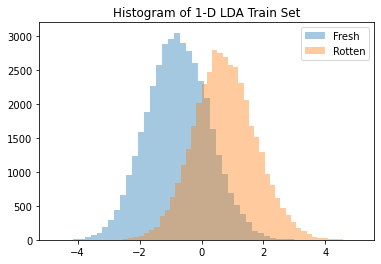

In [0]:
one = []
two = []
lda = LinearDiscriminantAnalysis()
lda.fit(train_X, train_y)
xx = lda.transform(train_X)
label_list = train_y.tolist()
for i in range(len(label_list)):
    if label_list[i] == 'fresh':
        one.append(xx[i])
    else:
        two.append(xx[i])
sns.distplot(one, kde=False, label='Fresh')
sns.distplot(two, kde=False, label='Rotten')
plt.title('Histogram of 1-D LDA Train Set')
plt.legend()
plt.show()

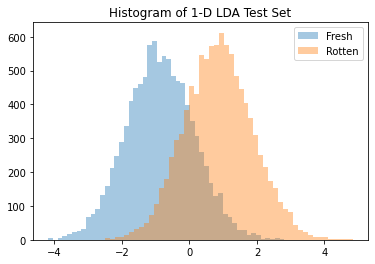

In [0]:
one = []
two = []
lda = LinearDiscriminantAnalysis()
lda.fit(test_X, test_y)
xx = lda.transform(test_X)
label_list = test_y.tolist()
for i in range(len(label_list)):
    if label_list[i] == 'fresh':
        one.append(xx[i])
    else:
        two.append(xx[i])
sns.distplot(one, kde=False, label='Fresh')
sns.distplot(two, kde=False, label='Rotten')
plt.title('Histogram of 1-D LDA Test Set')
plt.legend()
plt.show()

# Algorithms

## Naive Bayes

In [0]:
model_NB = BernoulliNB()
model_NB.fit(train_X, train_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Test accuracy : 74.71

Confusion Matrix on Test Set :


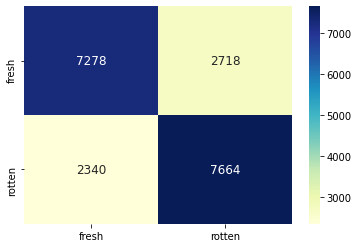


True Positives : 7664
False Positives : 2718
True Negatives : 7278
False Negatives : 2340

Classification report :
              precision    recall  f1-score   support

       fresh       0.76      0.73      0.74      9996
      rotten       0.74      0.77      0.75     10004

    accuracy                           0.75     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.75      0.75      0.75     20000



In [0]:
print('Test accuracy :', round(model_NB.score(test_X, test_y)*100,2))
print()
pred_test_labels = model_NB.predict(test_X)
print('Confusion Matrix on Test Set :')
cm=confusion_matrix(test_y, pred_test_labels)
df_cm = pd.DataFrame(cm, index = ['fresh', 'rotten'], columns = ['fresh', 'rotten'])
# plt.figure(figsize = (8,5))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu", annot_kws={"fontsize":12})
plt.show()
print()
tn, fp, fn, tp = confusion_matrix(test_y, pred_test_labels).ravel()
print('True Positives :', tp)
print('False Positives :', fp)
print('True Negatives :', tn)
print('False Negatives :', fn)
print()
print('Classification report :')
print(classification_report(test_y, pred_test_labels))

## Logistic Regression

In [0]:
model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Test accuracy : 74.81

Confusion Matrix on Test Set :


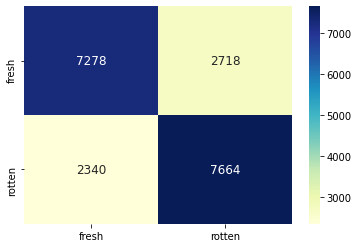


True Positives : 7664
False Positives : 2718
True Negatives : 7278
False Negatives : 2340

Classification report :
              precision    recall  f1-score   support

       fresh       0.76      0.73      0.74      9996
      rotten       0.74      0.77      0.75     10004

    accuracy                           0.75     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.75      0.75      0.75     20000



In [0]:
print('Test accuracy :', round(model_LR.score(test_X, test_y)*100,2))
print()
pred_test_labels = model_NB.predict(test_X)
print('Confusion Matrix on Test Set :')
cm=confusion_matrix(test_y, pred_test_labels)
df_cm = pd.DataFrame(cm, index = ['fresh', 'rotten'], columns = ['fresh', 'rotten'])
# plt.figure(figsize = (8,5))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu", annot_kws={"fontsize":12})
plt.show()
print()
tn, fp, fn, tp = confusion_matrix(test_y, pred_test_labels).ravel()
print('True Positives :', tp)
print('False Positives :', fp)
print('True Negatives :', tn)
print('False Negatives :', fn)
print()
print('Classification report :')
print(classification_report(test_y, pred_test_labels))

## Random Forrest

In [0]:
model_RF = RandomForestClassifier()
model_RF.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Test accuracy : 74.42

Confusion Matrix on Test Set :


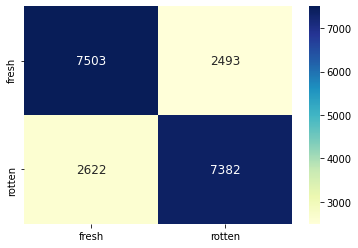


True Positives : 7382
False Positives : 2493
True Negatives : 7503
False Negatives : 2622

Classification report :
              precision    recall  f1-score   support

       fresh       0.74      0.75      0.75      9996
      rotten       0.75      0.74      0.74     10004

    accuracy                           0.74     20000
   macro avg       0.74      0.74      0.74     20000
weighted avg       0.74      0.74      0.74     20000



In [0]:
print('Test accuracy :', round(model_RF.score(test_X, test_y)*100,2))
print()
pred_test_labels = model_RF.predict(test_X)
print('Confusion Matrix on Test Set :')
cm=confusion_matrix(test_y, pred_test_labels)
df_cm = pd.DataFrame(cm, index = ['fresh', 'rotten'], columns = ['fresh', 'rotten'])
# plt.figure(figsize = (8,5))
sns.heatmap(df_cm, annot=True,fmt="d", cmap="YlGnBu", annot_kws={"fontsize":12})
plt.show()
print()
tn, fp, fn, tp = confusion_matrix(test_y, pred_test_labels).ravel()
print('True Positives :', tp)
print('False Positives :', fp)
print('True Negatives :', tn)
print('False Negatives :', fn)
print()
print('Classification report :')
print(classification_report(test_y, pred_test_labels))

## SVM

In [0]:
model_SVM = SVC()
model_SVM.fit(train_X, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Test accuracy : 75.92

Confusion Matrix on Test Set :


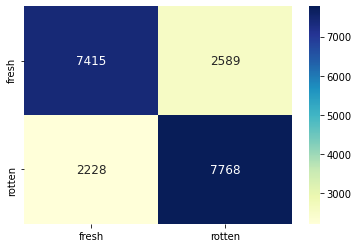


True Positives : 7768
False Positives : 2589
True Negatives : 7415
False Negatives : 2228

Classification report :
              precision    recall  f1-score   support

       fresh       0.77      0.74      0.75     10004
      rotten       0.75      0.78      0.76      9996

    accuracy                           0.76     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.76      0.76      0.76     20000



In [0]:
print('Test accuracy :', round(model_SVM.score(test_X, test_y)*100,2))
print()
pred_test_labels = model_SVM.predict(test_X)
print('Confusion Matrix on Test Set :')
cm=confusion_matrix(test_y, pred_test_labels)
df_cm = pd.DataFrame(cm, index = ['fresh', 'rotten'], columns = ['fresh', 'rotten'])
# plt.figure(figsize = (8,5))
sns.heatmap(df_cm, annot=True,fmt="d", cmap='coolwarm')
plt.show()
print()
tn, fp, fn, tp = confusion_matrix(test_y, pred_test_labels).ravel()
print('True Positives :', tp)
print('False Positives :', fp)
print('True Negatives :', tn)
print('False Negatives :', fn)
print()
print('Classification report :')
print(classification_report(test_y, pred_test_labels))

## Artificial Neural Network

In [0]:
inp_shape = train_X.shape[1]

In [0]:
avg_loss = []
avg_val_loss = []
avg_acc = []
avg_val_acc = []
test_acc_list = []

# train_X = train_X.toarray()
# test_X = test_X.toarray()
model = Sequential()
# model.add(Dropout(0.2))
model.add(Dense(inp_shape,input_shape=(inp_shape,), activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()
history = model.fit(train_X, train_y,
                epochs=15,
                batch_size=500,
                validation_split=0.2,
                shuffle = True)
loss = history.history['loss']
# avg_loss.append(sum(loss)/len(loss))

val_loss = history.history['val_loss']
# avg_val_loss.append(sum(val_loss)/len(val_loss))

acc = history.history['accuracy']
# avg_acc.append(sum(acc)/len(acc))

val_acc = history.history['val_accuracy']
# avg_val_acc.append(sum(val_acc)/len(val_acc))
test_loss, test_acc = model.evaluate(test_X, test_y)
# test_acc_list.append(test_acc)

Train on 64000 samples, validate on 16000 samples
Epoch 1/14
64000/64000 [==============================] - 53s 828us/step - loss: 0.5457 - accuracy: 0.7289 - val_loss: 0.5100 - val_accuracy: 0.7458
Epoch 2/14
64000/64000 [==============================] - 53s 826us/step - loss: 0.4729 - accuracy: 0.7707 - val_loss: 0.5049 - val_accuracy: 0.7509
Epoch 3/14
64000/64000 [==============================] - 53s 828us/step - loss: 0.4372 - accuracy: 0.7948 - val_loss: 0.5073 - val_accuracy: 0.7509
Epoch 4/14
64000/64000 [==============================] - 52s 819us/step - loss: 0.3786 - accuracy: 0.8347 - val_loss: 0.5126 - val_accuracy: 0.7566
Epoch 5/14
64000/64000 [==============================] - 52s 812us/step - loss: 0.2863 - accuracy: 0.8935 - val_loss: 0.5200 - val_accuracy: 0.7617
Epoch 6/14
64000/64000 [==============================] - 52s 815us/step - loss: 0.1761 - accuracy: 0.9546 - val_loss: 0.5451 - val_accuracy: 0.7636
Epoch 7/14
64000/64000 [==============================] 

Test accuracy : 77.06

Confusion Matrix on Test Set :


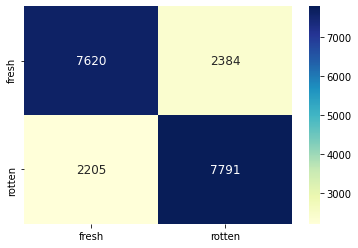


True Positives : 7791
False Positives : 2384
True Negatives : 7620
False Negatives : 2205

Classification report :
              precision    recall  f1-score   support

       fresh       0.78      0.76      0.77     10004
      rotten       0.77      0.78      0.77      9996

    accuracy                           0.77     20000
   macro avg       0.77      0.77      0.77     20000
weighted avg       0.77      0.77      0.77     20000



In [0]:
print('Test accuracy :', round(test_acc*100,2))
print()
pred_test_labels = model.predict(test_X)
thelist = []
for i in range(len(test_y)):
    if pred_test_labels[i][0] >= 0.5:
        thelist.append(1)
    else:
        thelist.append(0)
print('Confusion Matrix on Test Set :')
cm=confusion_matrix(test_y, thelist)
df_cm = pd.DataFrame(cm, index = ['fresh', 'rotten'], columns = ['fresh', 'rotten'])
# plt.figure(figsize = (8,5))
sns.heatmap(df_cm, annot=True,fmt="d", cmap="YlGnBu", annot_kws={"fontsize":12})
plt.show()
print()
tn, fp, fn, tp = confusion_matrix(test_y, thelist).ravel()
print('True Positives :', tp)
print('False Positives :', fp)
print('True Negatives :', tn)
print('False Negatives :', fn)
print()
print('Classification report :')
print(classification_report(test_y, thelist, target_names=['fresh', 'rotten']))

# Linear Discriminant Analysis approach

In [0]:
lda = LinearDiscriminantAnalysis()
lda_f = lda.fit(train_X, train_y)
train_X = lda_f.transform(train_X)
test_X = lda_f.transform(test_X)

## Naive Bayes

In [0]:
model_NB = BernoulliNB()
model_NB.fit(train_X, train_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Test accuracy : 74.58

Confusion Matrix on Test Set :


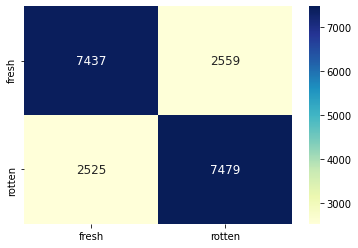


True Positives : 7479
False Positives : 2559
True Negatives : 7437
False Negatives : 2525

Classification report :
              precision    recall  f1-score   support

       fresh       0.75      0.74      0.75      9996
      rotten       0.75      0.75      0.75     10004

    accuracy                           0.75     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.75      0.75      0.75     20000



In [0]:
print('Test accuracy :', round(model_NB.score(test_X, test_y)*100,2))
print()
pred_test_labels = model_NB.predict(test_X)
print('Confusion Matrix on Test Set :')
cm=confusion_matrix(test_y, pred_test_labels)
df_cm = pd.DataFrame(cm, index = ['fresh', 'rotten'], columns = ['fresh', 'rotten'])
# plt.figure(figsize = (8,5))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu", annot_kws={"fontsize":12})
plt.show()
print()
tn, fp, fn, tp = confusion_matrix(test_y, pred_test_labels).ravel()
print('True Positives :', tp)
print('False Positives :', fp)
print('True Negatives :', tn)
print('False Negatives :', fn)
print()
print('Classification report :')
print(classification_report(test_y, pred_test_labels))

## Logistic Regression

In [0]:
model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Test accuracy : 74.58

Confusion Matrix on Test Set :


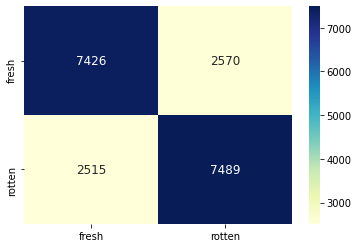


True Positives : 7489
False Positives : 2570
True Negatives : 7426
False Negatives : 2515

Classification report :
              precision    recall  f1-score   support

       fresh       0.75      0.74      0.74      9996
      rotten       0.74      0.75      0.75     10004

    accuracy                           0.75     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.75      0.75      0.75     20000



In [0]:
print('Test accuracy :', round(model_LR.score(test_X, test_y)*100,2))
print()
pred_test_labels = model_LR.predict(test_X)
print('Confusion Matrix on Test Set :')
cm=confusion_matrix(test_y, pred_test_labels)
df_cm = pd.DataFrame(cm, index = ['fresh', 'rotten'], columns = ['fresh', 'rotten'])
# plt.figure(figsize = (8,5))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu", annot_kws={"fontsize":12})
plt.show()
print()
tn, fp, fn, tp = confusion_matrix(test_y, pred_test_labels).ravel()
print('True Positives :', tp)
print('False Positives :', fp)
print('True Negatives :', tn)
print('False Negatives :', fn)
print()
print('Classification report :')
print(classification_report(test_y, pred_test_labels))

## Random Forrest

In [0]:
model_RF = RandomForestClassifier()
model_RF.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Test accuracy : 70.9

Confusion Matrix on Test Set :


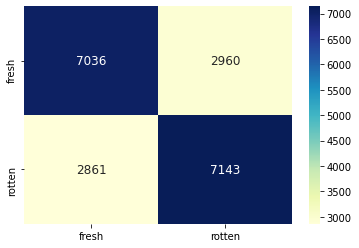


True Positives : 7143
False Positives : 2960
True Negatives : 7036
False Negatives : 2861

Classification report :
              precision    recall  f1-score   support

       fresh       0.71      0.70      0.71      9996
      rotten       0.71      0.71      0.71     10004

    accuracy                           0.71     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.71      0.71      0.71     20000



In [0]:
print('Test accuracy :', round(model_RF.score(test_X, test_y)*100,2))
print()
pred_test_labels = model_RF.predict(test_X)
print('Confusion Matrix on Test Set :')
cm=confusion_matrix(test_y, pred_test_labels)
df_cm = pd.DataFrame(cm, index = ['fresh', 'rotten'], columns = ['fresh', 'rotten'])
# plt.figure(figsize = (8,5))
sns.heatmap(df_cm, annot=True,fmt="d", cmap="YlGnBu", annot_kws={"fontsize":12})
plt.show()
print()
tn, fp, fn, tp = confusion_matrix(test_y, pred_test_labels).ravel()
print('True Positives :', tp)
print('False Positives :', fp)
print('True Negatives :', tn)
print('False Negatives :', fn)
print()
print('Classification report :')
print(classification_report(test_y, pred_test_labels))

## SVM

In [0]:
model_SVM = SVC()
model_SVM.fit(train_X, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Test accuracy : 74.56

Confusion Matrix on Test Set :


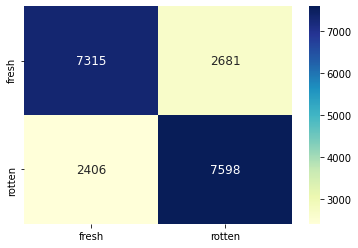


True Positives : 7598
False Positives : 2681
True Negatives : 7315
False Negatives : 2406

Classification report :
              precision    recall  f1-score   support

       fresh       0.75      0.73      0.74      9996
      rotten       0.74      0.76      0.75     10004

    accuracy                           0.75     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.75      0.75      0.75     20000



In [0]:
print('Test accuracy :', round(model_SVM.score(test_X, test_y)*100,2))
print()
pred_test_labels = model_SVM.predict(test_X)
print('Confusion Matrix on Test Set :')
cm=confusion_matrix(test_y, pred_test_labels)
df_cm = pd.DataFrame(cm, index = ['fresh', 'rotten'], columns = ['fresh', 'rotten'])
# plt.figure(figsize = (8,5))
sns.heatmap(df_cm, annot=True,fmt="d", cmap="YlGnBu", annot_kws={"fontsize":12})
plt.show()
print()
tn, fp, fn, tp = confusion_matrix(test_y, pred_test_labels).ravel()
print('True Positives :', tp)
print('False Positives :', fp)
print('True Negatives :', tn)
print('False Negatives :', fn)
print()
print('Classification report :')
print(classification_report(test_y, pred_test_labels))

## Artificial Neural Network

In [0]:
inp_shape = train_X.shape[1]

In [0]:
avg_loss = []
avg_val_loss = []
avg_acc = []
avg_val_acc = []
test_acc_list = []

# train_X = train_X.toarray()
# test_X = test_X.toarray()
model = Sequential()
# model.add(Dropout(0.2))
model.add(Dense(inp_shape,input_shape=(inp_shape,), activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()
history = model.fit(train_X, train_y,
                epochs=30,
                batch_size=500,
                validation_split=0.2,
                shuffle = True)
loss = history.history['loss']
# avg_loss.append(sum(loss)/len(loss))

val_loss = history.history['val_loss']
# avg_val_loss.append(sum(val_loss)/len(val_loss))

acc = history.history['accuracy']
# avg_acc.append(sum(acc)/len(acc))

val_acc = history.history['val_accuracy']
# avg_val_acc.append(sum(val_acc)/len(val_acc))
test_loss, test_acc = model.evaluate(test_X, test_y)
# test_acc_list.append(test_acc)

Train on 64000 samples, validate on 16000 samples
Epoch 1/30
64000/64000 [==============================] - 0s 4us/step - loss: 0.6434 - accuracy: 0.7746 - val_loss: 0.6239 - val_accuracy: 0.7722
Epoch 2/30
64000/64000 [==============================] - 0s 3us/step - loss: 0.6047 - accuracy: 0.7733 - val_loss: 0.5872 - val_accuracy: 0.7703
Epoch 3/30
64000/64000 [==============================] - 0s 3us/step - loss: 0.5710 - accuracy: 0.7729 - val_loss: 0.5575 - val_accuracy: 0.7719
Epoch 4/30
64000/64000 [==============================] - 0s 3us/step - loss: 0.5453 - accuracy: 0.7734 - val_loss: 0.5360 - val_accuracy: 0.7721
Epoch 5/30
64000/64000 [==============================] - 0s 3us/step - loss: 0.5270 - accuracy: 0.7735 - val_loss: 0.5211 - val_accuracy: 0.7722
Epoch 6/30
64000/64000 [==============================] - 0s 3us/step - loss: 0.5145 - accuracy: 0.7734 - val_loss: 0.5110 - val_accuracy: 0.7721
Epoch 7/30
64000/64000 [==============================] - 0s 3us/step - lo

Test accuracy : 74.57

Confusion Matrix on Test Set :


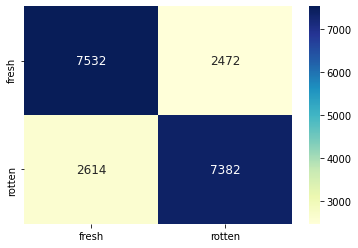


True Positives : 7382
False Positives : 2472
True Negatives : 7532
False Negatives : 2614

Classification report :
              precision    recall  f1-score   support

       fresh       0.74      0.75      0.75     10004
      rotten       0.75      0.74      0.74      9996

    accuracy                           0.75     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.75      0.75      0.75     20000



In [0]:
print('Test accuracy :', round(test_acc*100,2))
print()
pred_test_labels = model.predict(test_X)
thelist = []
for i in range(len(test_y)):
    if pred_test_labels[i][0] > 0.5:
        thelist.append(1)
    else:
        thelist.append(0)
print('Confusion Matrix on Test Set :')
cm=confusion_matrix(test_y, thelist)
df_cm = pd.DataFrame(cm, index = ['fresh', 'rotten'], columns = ['fresh', 'rotten'])
# plt.figure(figsize = (8,5))
sns.heatmap(df_cm, annot=True,fmt="d", cmap="YlGnBu", annot_kws={"fontsize":12})
plt.show()
print()
tn, fp, fn, tp = confusion_matrix(test_y, thelist).ravel()
print('True Positives :', tp)
print('False Positives :', fp)
print('True Negatives :', tn)
print('False Negatives :', fn)
print()
print('Classification report :')
print(classification_report(test_y, thelist, target_names=['fresh', 'rotten']))